In [ ]:
from google.colab import drive

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import numpy as np  #for array
import pandas as pd   #for dataset
import matplotlib.pyplot as plt #for graph plotting
import seaborn as sns
from bs4 import BeautifulSoup #html parsing
import re     #regular expressions
import nltk #for downloading stopwords
from nltk.corpus import stopwords   #stopwords

from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

%cd /content/drive/My Drive/
df = pd.read_csv('IMDB Dataset.csv')

/content/drive/My Drive


In [ ]:
df = df[0:7000]
df

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive
...,...,...
6995,I rented this obscure aussie relic a few years...,positive
6996,Okay - I'll confess. This is the movie that ma...,positive
6997,I'm probably one of the biggest Nancy Drew fan...,positive
6998,The movie began well enough. It had a fellow g...,negative


In [ ]:
print("Shape:")
print(df.shape)

Shape:
(7000, 2)


In [ ]:
print("Types:")
print(df.dtypes)

Types:
review       object
sentiment    object
dtype: object


In [ ]:
print("Head:")
print(df.head())

Head:
                                              review sentiment
0  One of the other reviewers has mentioned that ...  positive
1  A wonderful little production. <br /><br />The...  positive
2  I thought this was a wonderful way to spend ti...  positive
3  Basically there's a family where a little boy ...  negative
4  Petter Mattei's "Love in the Time of Money" is...  positive


In [ ]:
df.describe()

,review,sentiment
count,7000,7000
unique,6994,2
top,My favourite police series of all time turns t...,negative
freq,2,3505


In [ ]:
#sentiment count
df['sentiment'].value_counts()

negative    3505
positive    3495
Name: sentiment, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


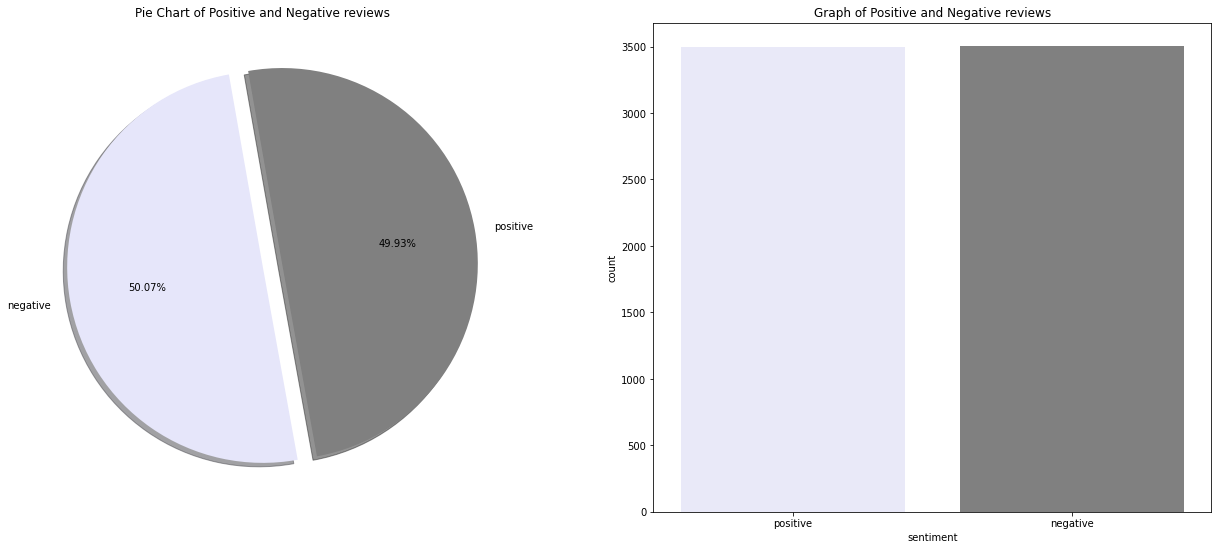

In [ ]:
a , ax = plt.subplots(1,2,figsize=(22,9))
df['sentiment'].value_counts().plot.pie(explode=[0,0.1], autopct='%1.2f%%',ax=ax[0],shadow=True, startangle=100, colors = ["Lavender", "Grey"])
ax[0].set_title('Pie Chart of Positive and Negative reviews')
ax[0].set_ylabel('')
sns.countplot('sentiment', data = df ,ax=ax[1], palette=["Lavender", "Grey"])
ax[1].set_title('Graph of Positive and Negative reviews')
plt.show()

## **Data Preprocessing**

In [ ]:
#printing column names and data types
print(df.keys())

Index(['review', 'sentiment'], dtype='object')


In [ ]:
# printing reviews
df['review']

0       One of the other reviewers has mentioned that ...
1       A wonderful little production. <br /><br />The...
2       I thought this was a wonderful way to spend ti...
3       Basically there's a family where a little boy ...
4       Petter Mattei's "Love in the Time of Money" is...
                              ...                        
6995    I rented this obscure aussie relic a few years...
6996    Okay - I'll confess. This is the movie that ma...
6997    I'm probably one of the biggest Nancy Drew fan...
6998    The movie began well enough. It had a fellow g...
6999    I watched the Unrated version of this film and...
Name: review, Length: 7000, dtype: object

In [ ]:
df.review[2]

'I thought this was a wonderful way to spend time on a too hot summer weekend, sitting in the air conditioned theater and watching a light-hearted comedy. The plot is simplistic, but the dialogue is witty and the characters are likable (even the well bread suspected serial killer). While some may be disappointed when they realize this is not Match Point 2: Risk Addiction, I thought it was proof that Woody Allen is still fully in control of the style many of us have grown to love.<br /><br />This was the most I\'d laughed at one of Woody\'s comedies in years (dare I say a decade?). While I\'ve never been impressed with Scarlet Johanson, in this she managed to tone down her "sexy" image and jumped right into a average, but spirited young woman.<br /><br />This may not be the crown jewel of his career, but it was wittier than "Devil Wears Prada" and more interesting than "Superman" a great comedy to go see with friends.'

In [ ]:
#function to remove html strips
def strip_html(text):
    soup = BeautifulSoup(text, "html.parser")
    return soup.get_text()

#calling the strip_html fucntion
df['review']=df['review'].apply(strip_html)

All the html strips have been removed after executing the above function.


In [ ]:
df.review[2]

'I thought this was a wonderful way to spend time on a too hot summer weekend, sitting in the air conditioned theater and watching a light-hearted comedy. The plot is simplistic, but the dialogue is witty and the characters are likable (even the well bread suspected serial killer). While some may be disappointed when they realize this is not Match Point 2: Risk Addiction, I thought it was proof that Woody Allen is still fully in control of the style many of us have grown to love.This was the most I\'d laughed at one of Woody\'s comedies in years (dare I say a decade?). While I\'ve never been impressed with Scarlet Johanson, in this she managed to tone down her "sexy" image and jumped right into a average, but spirited young woman.This may not be the crown jewel of his career, but it was wittier than "Devil Wears Prada" and more interesting than "Superman" a great comedy to go see with friends.'

In [ ]:
#function to remove square brackets
def square_brackets(text):
    return re.sub('\[[^]]*\]', '', text)

#calling the square_brackets function
df['review']=df['review'].apply(square_brackets)

In [ ]:
df.review[2]

'I thought this was a wonderful way to spend time on a too hot summer weekend, sitting in the air conditioned theater and watching a light-hearted comedy. The plot is simplistic, but the dialogue is witty and the characters are likable (even the well bread suspected serial killer). While some may be disappointed when they realize this is not Match Point 2: Risk Addiction, I thought it was proof that Woody Allen is still fully in control of the style many of us have grown to love.This was the most I\'d laughed at one of Woody\'s comedies in years (dare I say a decade?). While I\'ve never been impressed with Scarlet Johanson, in this she managed to tone down her "sexy" image and jumped right into a average, but spirited young woman.This may not be the crown jewel of his career, but it was wittier than "Devil Wears Prada" and more interesting than "Superman" a great comedy to go see with friends.'

In [ ]:
#function for converting everything to lowercase
def lowercase(text):
    return text.lower()

#calling the lowercase function
df['review']= df['review'].apply(lowercase)

In [ ]:
df.review[2]

'i thought this was a wonderful way to spend time on a too hot summer weekend, sitting in the air conditioned theater and watching a light-hearted comedy. the plot is simplistic, but the dialogue is witty and the characters are likable (even the well bread suspected serial killer). while some may be disappointed when they realize this is not match point 2: risk addiction, i thought it was proof that woody allen is still fully in control of the style many of us have grown to love.this was the most i\'d laughed at one of woody\'s comedies in years (dare i say a decade?). while i\'ve never been impressed with scarlet johanson, in this she managed to tone down her "sexy" image and jumped right into a average, but spirited young woman.this may not be the crown jewel of his career, but it was wittier than "devil wears prada" and more interesting than "superman" a great comedy to go see with friends.'

In [ ]:
#function to remove special characters and punctuation
def special_chars(text):
    x =''

    for i in text:
        if i.isalnum():
            x = x+i
        else:
            x = x + ' '
    return x;

#calling the special_chars function
df['review']= df['review'].apply(special_chars)

In [ ]:
df.review[2]

'i thought this was a wonderful way to spend time on a too hot summer weekend  sitting in the air conditioned theater and watching a light hearted comedy  the plot is simplistic  but the dialogue is witty and the characters are likable  even the well bread suspected serial killer   while some may be disappointed when they realize this is not match point 2  risk addiction  i thought it was proof that woody allen is still fully in control of the style many of us have grown to love this was the most i d laughed at one of woody s comedies in years  dare i say a decade    while i ve never been impressed with scarlet johanson  in this she managed to tone down her  sexy  image and jumped right into a average  but spirited young woman this may not be the crown jewel of his career  but it was wittier than  devil wears prada  and more interesting than  superman  a great comedy to go see with friends '

In [ ]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
words = set(stopwords.words("english"))
#words

In [ ]:
#removing the stopwords
def r_stopwords(text):
    x=[]
    for i in text.split():
        if i not in stopwords.words('english'):
            x.append(i)
    #y = x[:]
    #x.clear()
    return x

#calling the remove_stopwords function
df['review']= df['review'].apply(r_stopwords)

In [ ]:
df.review[2]

['thought',
 'wonderful',
 'way',
 'spend',
 'time',
 'hot',
 'summer',
 'weekend',
 'sitting',
 'air',
 'conditioned',
 'theater',
 'watching',
 'light',
 'hearted',
 'comedy',
 'plot',
 'simplistic',
 'dialogue',
 'witty',
 'characters',
 'likable',
 'even',
 'well',
 'bread',
 'suspected',
 'serial',
 'killer',
 'may',
 'disappointed',
 'realize',
 'match',
 'point',
 '2',
 'risk',
 'addiction',
 'thought',
 'proof',
 'woody',
 'allen',
 'still',
 'fully',
 'control',
 'style',
 'many',
 'us',
 'grown',
 'love',
 'laughed',
 'one',
 'woody',
 'comedies',
 'years',
 'dare',
 'say',
 'decade',
 'never',
 'impressed',
 'scarlet',
 'johanson',
 'managed',
 'tone',
 'sexy',
 'image',
 'jumped',
 'right',
 'average',
 'spirited',
 'young',
 'woman',
 'may',
 'crown',
 'jewel',
 'career',
 'wittier',
 'devil',
 'wears',
 'prada',
 'interesting',
 'superman',
 'great',
 'comedy',
 'go',
 'see',
 'friends']

In [ ]:
# convert the list back to string
def join_back(list_input):
    return " ".join(list_input)

df['review']= df['review'].apply(join_back)

In [ ]:
df.review[2]

'thought wonderful way spend time hot summer weekend sitting air conditioned theater watching light hearted comedy plot simplistic dialogue witty characters likable even well bread suspected serial killer may disappointed realize match point 2 risk addiction thought proof woody allen still fully control style many us grown love laughed one woody comedies years dare say decade never impressed scarlet johanson managed tone sexy image jumped right average spirited young woman may crown jewel career wittier devil wears prada interesting superman great comedy go see friends'

**Model**

In [ ]:
review_array = np.array(df["review"])
sentiment_array = np.array(df["sentiment"])

In [ ]:
#x-review
#y-sentiment
#random state controls the shuffling process
train_x, test_x, train_y, test_y = train_test_split(review_array, sentiment_array, stratify = sentiment_array ,test_size = 0.2, shuffle = True , random_state = 25)

In [ ]:
#Implementing Bag Of Words using CountVectorizer

vectorizer = CountVectorizer(max_features = 10000)

train_x = vectorizer.fit_transform(train_x)
test_x = vectorizer.transform(test_x)


In [ ]:
#Converting data(matrix) to array so that the machine learning algorithms can work
train_x = train_x.toarray()
test_x = test_x.toarray()

In [ ]:
print(train_x.shape[0])
print(train_y.shape[0])

5600
5600


In [ ]:
print(test_x.shape[0])
print(test_y.shape[0])

1400
1400


In [ ]:
#Training and Testing the models

#Logistic Regression
logreg = LogisticRegression(max_iter=3000)
logreg.fit(train_x, train_y)
test_prediction = logreg.predict(test_x)
print('Logistic Regression Model - Accuracy Score:', accuracy_score(test_y, test_prediction))

#Decision Tree Classifier
decision_tree = DecisionTreeClassifier()
decision_tree.fit(train_x, train_y)
test_prediction = decision_tree.predict(test_x)
print('Decision Tree Classifier - Accuracy Score:', accuracy_score(test_y, test_prediction))

#Random Forest Classifier
random_forest = RandomForestClassifier(n_estimators=200)
random_forest.fit(train_x, train_y)
test_prediction = random_forest.predict(test_x)
print('Random Forest Classifier - Accuracy Score:', accuracy_score(test_y, test_prediction))

Logistic Regression Model - Accuracy Score: 0.8457142857142858
Decision Tree Classifier - Accuracy Score: 0.7264285714285714
Random Forest Classifier - Accuracy Score: 0.8557142857142858
